In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)
coordinates

[(49.40458958219398, 107.51867808598217),
 (-89.01734958315636, -81.78145476661112),
 (72.33070407507779, 45.208147442630946),
 (56.05744871511945, 13.208738044117496),
 (-69.11331427991793, 172.12095258499568),
 (-11.651364442659215, 12.730747962643335),
 (34.721809616598804, -39.86008008962867),
 (21.287552136109724, 6.635123660077028),
 (64.2978886315118, 31.01560779185914),
 (72.96454079166847, 110.40464468002284),
 (8.04095234108658, -37.05656879374263),
 (-87.88298023169199, 138.29632363366562),
 (-9.617273406864896, -69.04071059483907),
 (-25.65476493041058, 21.979094695779736),
 (-57.19300323113658, 139.56735869854396),
 (-10.648617038090578, 160.62756137574797),
 (-1.693339776717778, 167.61233460890014),
 (68.32402667017092, 91.10352250209144),
 (57.86818967099566, -173.80580258098766),
 (66.01769279952677, -27.997130836818513),
 (13.672276553277982, -123.89255728817406),
 (-11.50219128055609, 174.7743496397756),
 (52.42358986731645, 61.259444858581304),
 (-19.192568129045625,

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=666fc481726ecf78efed4da2ec6af0ff


In [9]:
# declare an empty list to hold the weather data
city_data = []

# add print statement referencing the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        # Generally not best practice to add a pass statement 
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | chikoy
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kamenka
Processing Record 4 of Set 1 | eslov
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | lobito
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | arlit
Processing Record 9 of Set 1 | kostomuksha
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | itarema
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | sena madureira
Processing Record 14 of Set 1 | tsabong
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | kirakira
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | asau

City not found. Skipping...
Processing Record 37 of Set 4 | havoysund
Processing Record 38 of Set 4 | bilma
Processing Record 39 of Set 4 | orlik
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | dalnerechensk
Processing Record 42 of Set 4 | felidhoo
City not found. Skipping...
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | florida
Processing Record 45 of Set 4 | divo
Processing Record 46 of Set 4 | yambio
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | duldurga
Processing Record 49 of Set 4 | loreto
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | gwadar
Processing Record 2 of Set 5 | mecca
Processing Record 3 of Set 5 | bud
Processing Record 4 of Set 5 | narasannapeta
Processing Record 5 of Set 5 | kampong cham
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | mattru
Processing Record 8 of Set 5 | san carlos del zulia
Processing Record 9 of Set 5 | belushya guba
City not found

Processing Record 26 of Set 8 | hailar
Processing Record 27 of Set 8 | cabo san lucas
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | husavik
Processing Record 30 of Set 8 | okhotsk
Processing Record 31 of Set 8 | alvaro obregon
Processing Record 32 of Set 8 | guadalupe y calvo
Processing Record 33 of Set 8 | strezhevoy
Processing Record 34 of Set 8 | le vauclin
Processing Record 35 of Set 8 | mala tokmachka
Processing Record 36 of Set 8 | komyshnya
Processing Record 37 of Set 8 | karatau
Processing Record 38 of Set 8 | moerai
Processing Record 39 of Set 8 | kytmanovo
Processing Record 40 of Set 8 | mashhad
Processing Record 41 of Set 8 | denpasar
Processing Record 42 of Set 8 | namatanai
Processing Record 43 of Set 8 | mapiripan
Processing Record 44 of Set 8 | georgiyevka
Processing Record 45 of Set 8 | sitka
Processing Record 46 of Set 8 | meadow lake
Processing Record 47 of Set 8 | hervey bay
Processing Record 48 of Set 8 | abramovka
Processing Record 49 of 

Processing Record 16 of Set 12 | yegorlykskaya
Processing Record 17 of Set 12 | amot
Processing Record 18 of Set 12 | axim
Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | rokytne
Processing Record 21 of Set 12 | kochi
Processing Record 22 of Set 12 | campobasso
Processing Record 23 of Set 12 | mehamn
Processing Record 24 of Set 12 | bahia blanca
Processing Record 25 of Set 12 | ahuimanu
Processing Record 26 of Set 12 | porkhov
Processing Record 27 of Set 12 | beira
Processing Record 28 of Set 12 | dali
Processing Record 29 of Set 12 | beloye
Processing Record 30 of Set 12 | blagoveshchensk
Processing Record 31 of Set 12 | koch bihar
Processing Record 32 of Set 12 | nalut
Processing Record 33 of Set 12 | kaeo
Processing Record 34 of Set 12 | ranong
Processing Record 35 of Set 12 | frontera
Processing Record 36 of Set 12 | phangnga
Processing Record 37 of Set 12 | hobyo
Processing Record 38 of Set 12 | port keats
Processing Record 39 of Set 12 | acobamba
P

In [10]:
len(city_data)

581

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,70,20,11.50,AR,2022-04-07 21:04:02
1,Kamenka,51.3223,42.7678,46.24,74,90,8.97,RU,2022-04-07 21:04:03
2,Eslov,55.8393,13.3039,41.02,92,100,11.79,SE,2022-04-07 21:04:03
3,Bluff,-46.6000,168.3333,55.81,72,97,27.07,NZ,2022-04-07 21:01:32
4,Lobito,-12.3481,13.5456,75.60,85,79,0.72,AO,2022-04-07 21:04:04
5,Ribeira Grande,38.5167,-28.7000,60.75,82,100,9.60,PT,2022-04-07 21:04:04
6,Arlit,18.7369,7.3853,89.73,6,1,8.28,NE,2022-04-07 21:04:04
7,Kostomuksha,64.5710,30.5767,26.53,95,100,10.69,RU,2022-04-07 21:04:05
8,Saskylakh,71.9167,114.0833,-24.88,100,18,3.27,RU,2022-04-07 21:04:05
9,Itarema,-2.9248,-39.9167,77.63,88,88,10.63,BR,2022-04-07 21:04:06


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-07 21:04:02,-54.8000,-68.3000,40.66,70,20,11.50
1,Kamenka,RU,2022-04-07 21:04:03,51.3223,42.7678,46.24,74,90,8.97
2,Eslov,SE,2022-04-07 21:04:03,55.8393,13.3039,41.02,92,100,11.79
3,Bluff,NZ,2022-04-07 21:01:32,-46.6000,168.3333,55.81,72,97,27.07
4,Lobito,AO,2022-04-07 21:04:04,-12.3481,13.5456,75.60,85,79,0.72
5,Ribeira Grande,PT,2022-04-07 21:04:04,38.5167,-28.7000,60.75,82,100,9.60
6,Arlit,NE,2022-04-07 21:04:04,18.7369,7.3853,89.73,6,1,8.28
7,Kostomuksha,RU,2022-04-07 21:04:05,64.5710,30.5767,26.53,95,100,10.69
8,Saskylakh,RU,2022-04-07 21:04:05,71.9167,114.0833,-24.88,100,18,3.27
9,Itarema,BR,2022-04-07 21:04:06,-2.9248,-39.9167,77.63,88,88,10.63


In [13]:
# Create the output file (CSV).
#from just running the "cties.csv" we can identify where the "default location is"
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

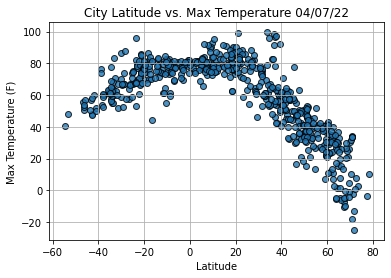

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

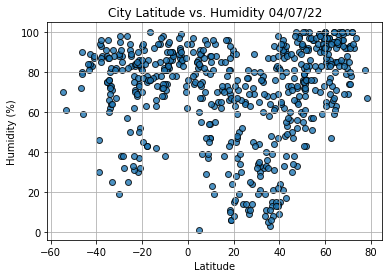

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

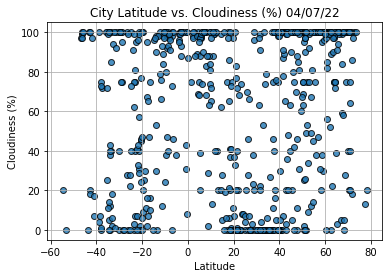

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

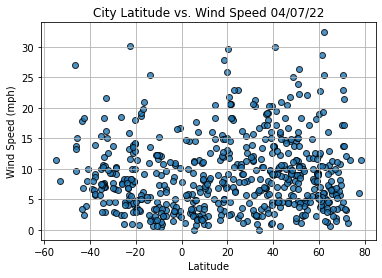

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()